### 1. Collecting the data

In [1]:
import pandas as pd

df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [2]:
# Converting DateTime format into Date format
df['date'] = pd.to_datetime(df['date'], format = 'mixed').dt.date

In [3]:
df.shape

(7588, 2)

In [4]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


### 2. Exploratory Data Analysis

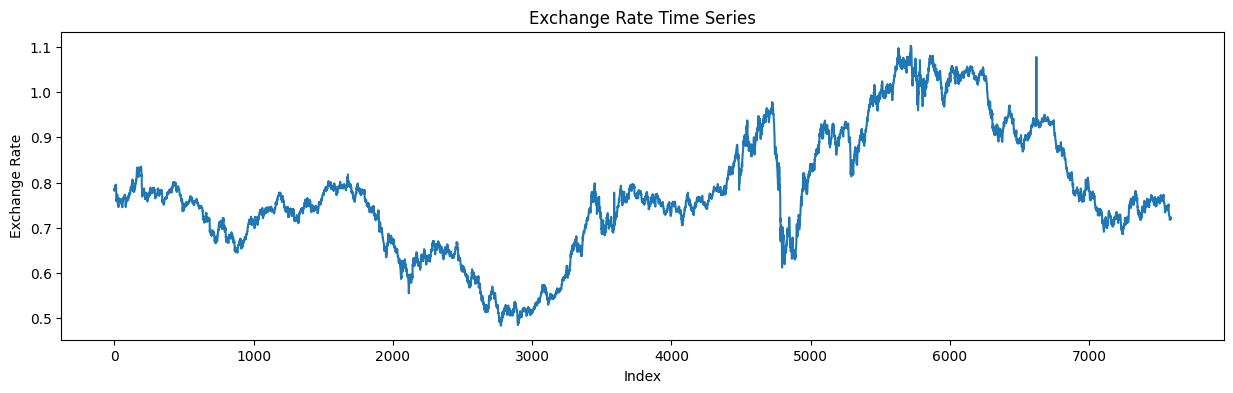

In [5]:
# Line plot of the Ex_rate
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))
sns.lineplot(df, x=df.index, y='Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Index')
plt.ylabel('Exchange Rate')
plt.show()
# We can observe that the data is non-stationary.

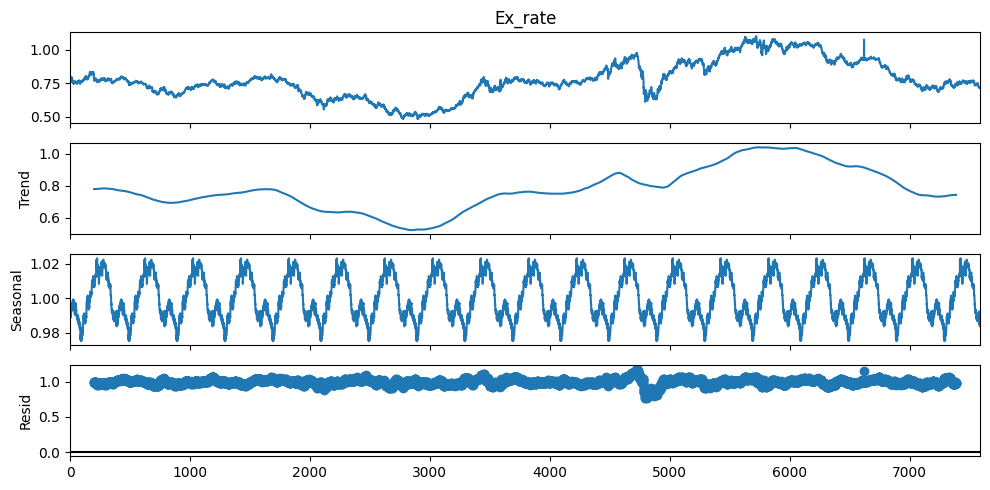

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
decompose_ts_add = seasonal_decompose(df.Ex_rate, model='multiplicative', period=400)
decompose_ts_add.plot()
plt.show()

In [7]:
# Here there are X variables in the dataset.
# Hence, we have to create the X variables
# t variable is the column which contains row number.
df['t'] = df.index + 1
df.head()

,date,Ex_rate,t
0,1990-01-01,0.7855,1
1,1990-02-01,0.7818,2
2,1990-03-01,0.7867,3
3,1990-04-01,0.7860,4
4,1990-05-01,0.7849,5


In [8]:
import numpy as np
df['log_ex_rate'] = np.log(df['Ex_rate'])
df.head()

,date,Ex_rate,t,log_ex_rate
0,1990-01-01,0.7855,1,-0.241435
1,1990-02-01,0.7818,2,-0.246156
2,1990-03-01,0.7867,3,-0.239908
3,1990-04-01,0.7860,4,-0.240798
4,1990-05-01,0.7849,5,-0.242199


In [9]:
df['t_square'] = df['t'] ** 2
df.head()

,date,Ex_rate,t,log_ex_rate,t_square
0,1990-01-01,0.7855,1,-0.241435,1
1,1990-02-01,0.7818,2,-0.246156,4
2,1990-03-01,0.7867,3,-0.239908,9
3,1990-04-01,0.7860,4,-0.240798,16
4,1990-05-01,0.7849,5,-0.242199,25


In [10]:
# Extracting month from the date column
df['month'] = pd.to_datetime(df['date']).dt.strftime('%b')
df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month
0,1990-01-01,0.7855,1,-0.241435,1,Jan
1,1990-02-01,0.7818,2,-0.246156,4,Feb
2,1990-03-01,0.7867,3,-0.239908,9,Mar
3,1990-04-01,0.7860,4,-0.240798,16,Apr
4,1990-05-01,0.7849,5,-0.242199,25,May


In [11]:
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month,year
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990
4,1990-05-01,0.7849,5,-0.242199,25,May,1990


In [12]:
list(df['month'].unique())

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [13]:
# One Hot Encoding
encoded_df = pd.get_dummies(df['month'], prefix='', dtype=int).sort_index(axis=1)
encoded_df

,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,0,0,0,0,0,0,1,0,0,0,0,0
7584,0,0,0,0,0,1,0,0,0,0,0,0
7585,0,1,0,0,0,0,0,0,0,0,0,0
7586,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
final_df = pd.concat([df, encoded_df], axis = 1)
final_df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.7849,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0


0.2611267376737365

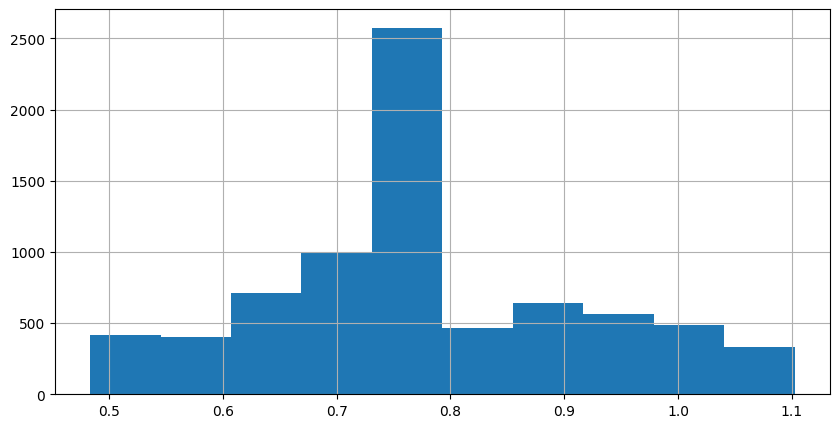

In [15]:
# histogram
df['Ex_rate'].hist()
df['Ex_rate'].skew()

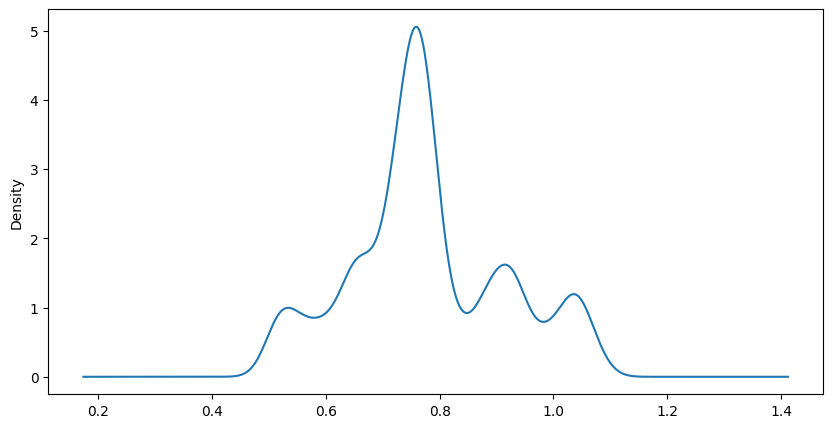

In [16]:
df['Ex_rate'].plot(kind='kde')
plt.show()

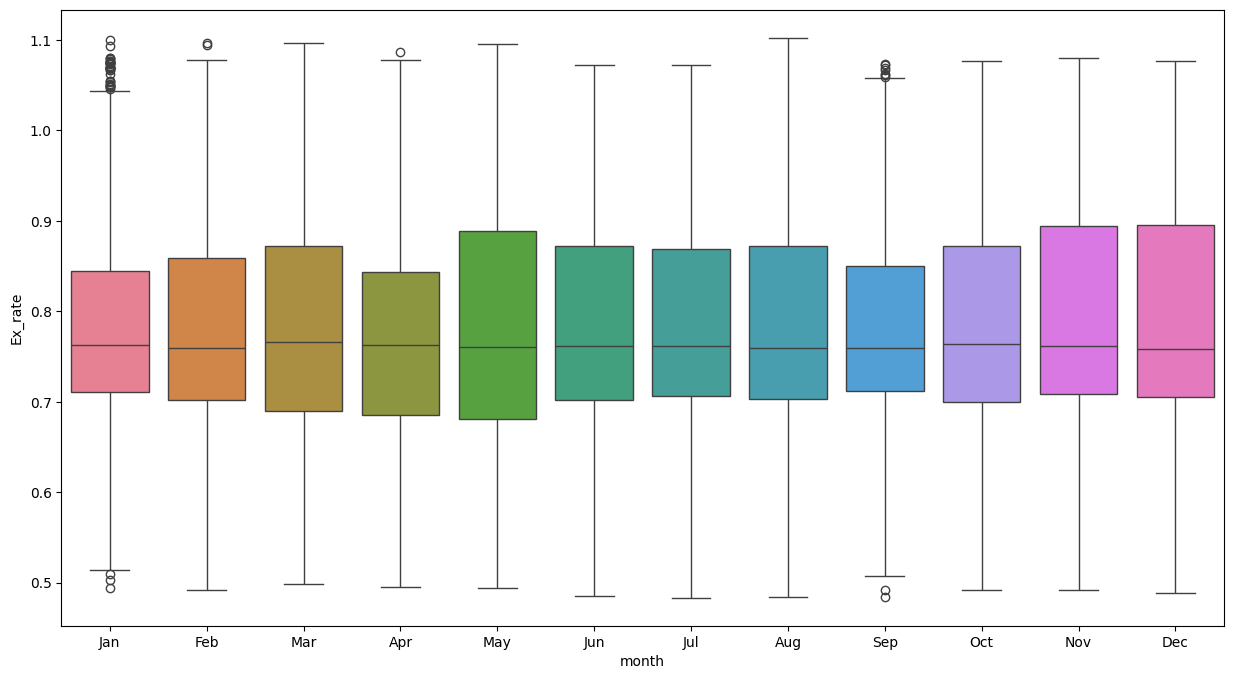

In [17]:
# Box plot of Ex_rate column monthly-wise
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_df, x = 'month', y='Ex_rate', hue='month')
plt.show()

This is the boxplot of the monthly-wise exchange rate, where outliers are prepsent in the months of Jan, Feb, Apr and Sep.

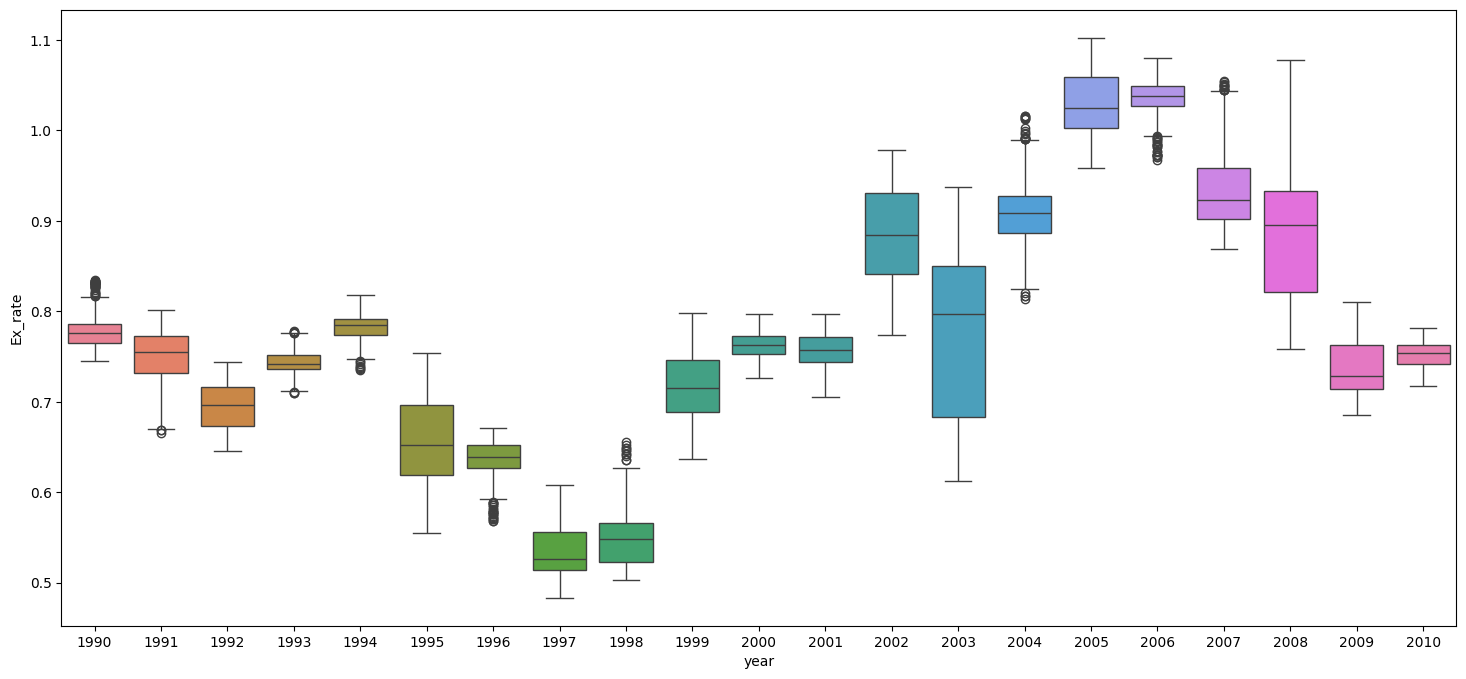

In [18]:
# Box plot of Ex_rate column Year-wise
plt.figure(figsize=(18, 8))
sns.boxplot(data=final_df, x = 'year', y='Ex_rate', hue='year')
plt.show()

This the boxplot of the Year-wise exchange rate, where outliers are present in the years 1990, 1991, 1993, 1994, 1996, 1998, 2004, 2006, and 2007.

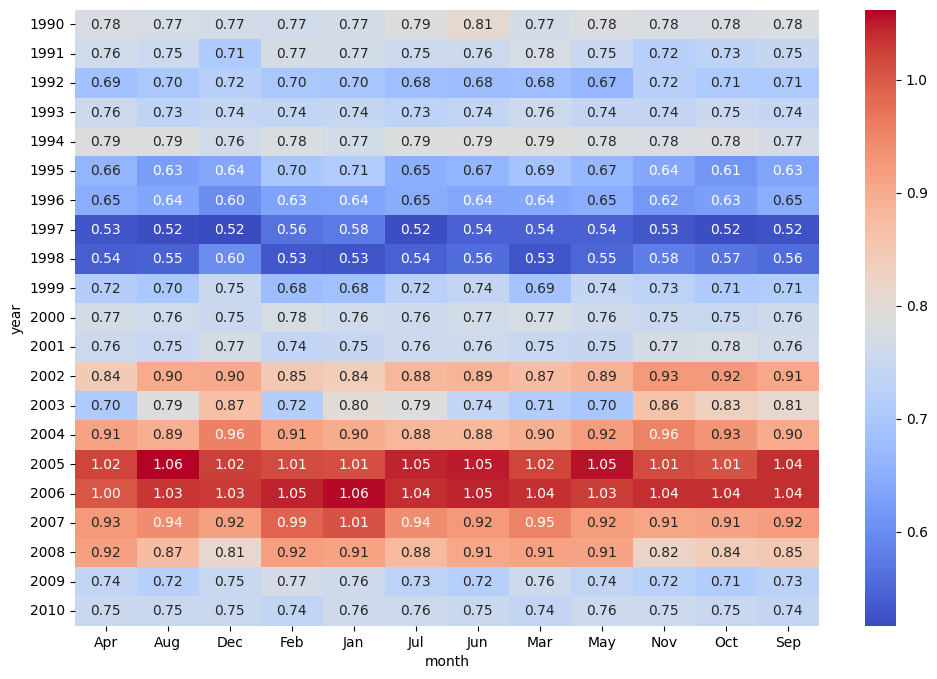

In [19]:
heat_map = pd.pivot_table(data=final_df, index='year', values='Ex_rate', columns='month')

plt.figure(figsize=(12, 8))
sns.heatmap(data=heat_map, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

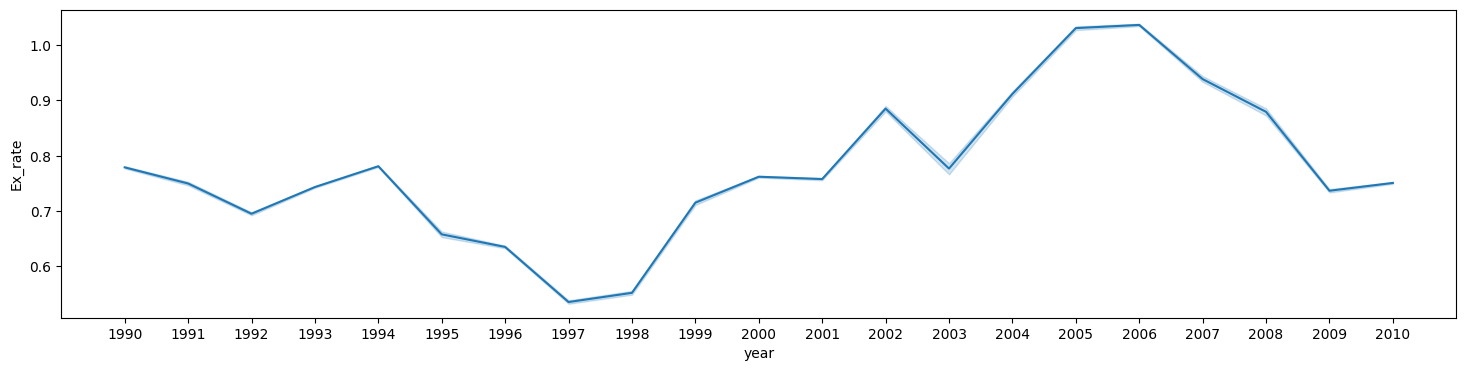

In [20]:
# Year-wise Line plot
plt.figure(figsize=(18, 4))
sns.lineplot(data=final_df, x='year', y='Ex_rate')
plt.show()

In [21]:
df['Ex_rate_diff'] = df['Ex_rate'].diff()

<Axes: >

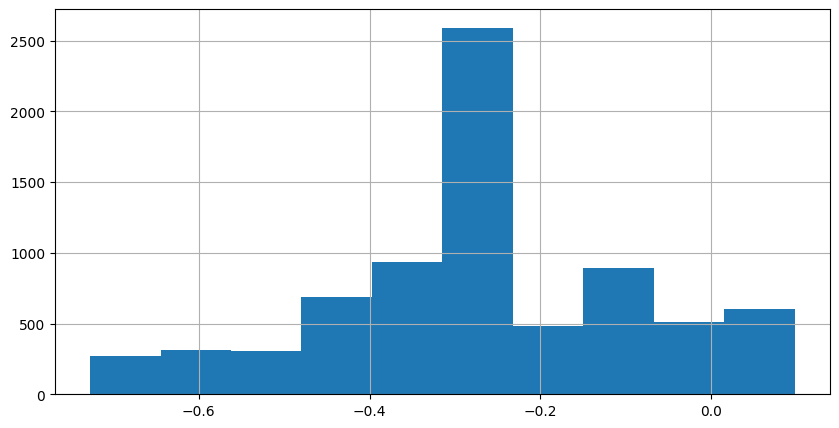

In [22]:
df['log_ex_rate'].hist()

In [23]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Ex_rate_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -99.39343120118629
p-value: 0.0


#### Autocorrelation and Partial Autocorrelation

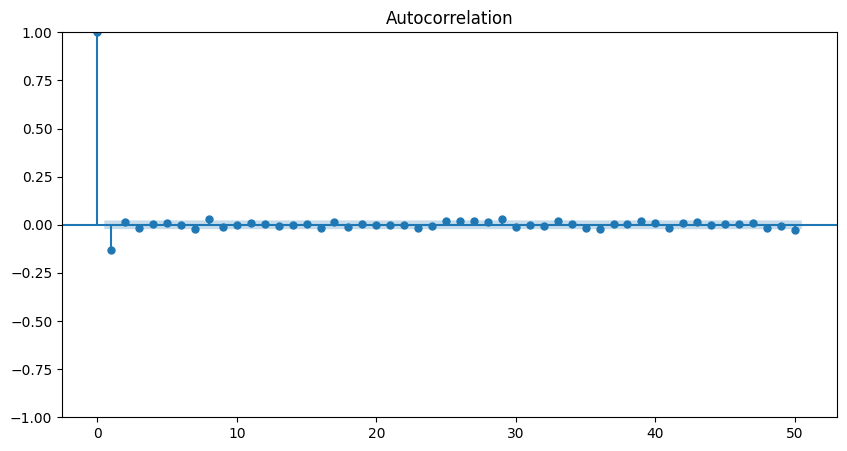

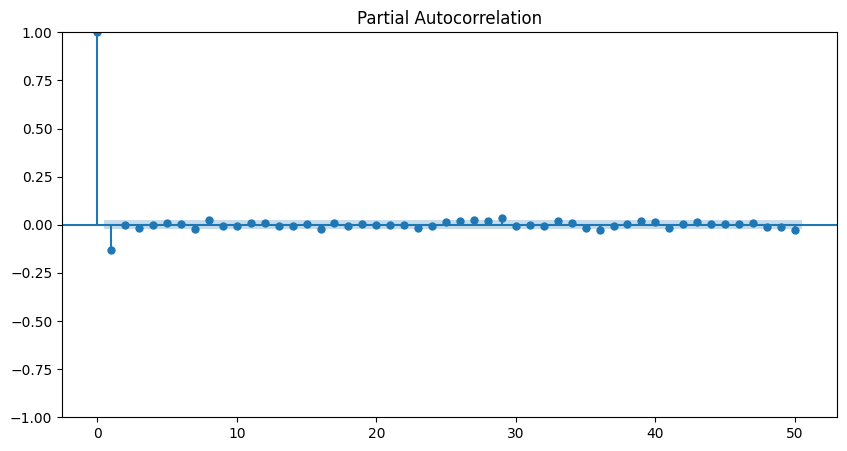

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate_diff'].dropna(), lags=50)
plt.show()

plot_pacf(df['Ex_rate_diff'].dropna(), lags=50)
plt.show()

#### Holt-Winter's Exponential Smoothing

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

smoothing_levels = np.linspace(0.1, 0.9, 9) 
smoothing_slopes = np.linspace(0.01, 0.1, 10)
best_params = None
best_rmse = float('inf')

for alpha in smoothing_levels:
    for beta in smoothing_slopes:
        model = Holt(df['Ex_rate'], exponential=True, damped=True)
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        predictions = model_fit.predict(start=0, end=len(df)-1)
        rmse = mean_squared_error(df['Ex_rate'], predictions, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (alpha, beta)

C:\Users\cs833\AppData\Local\Temp\ipykernel_14456\912012058.py:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(df['Ex_rate'], exponential=True, damped=True)
C:\Users\cs833\AppData\Local\Temp\ipykernel_14456\912012058.py:12: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\cs833\AppData\Local\Temp\ipykernel_14456\912012058.py:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(df['Ex_rate'], exponential=True, damped=True)
C:\Users\cs833\AppData\Local\Temp\ipykernel_14456\912012058.py:12: FutureWar

In [26]:
# Model fitting and forecating
model_holt = Holt(df['Ex_rate'], exponential=True, damped=True)
fitted_holt = model_holt.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])
predictions_holt = fitted_holt.predict(start=0, end=len(df)-1)

C:\Users\cs833\AppData\Local\Temp\ipykernel_14456\630716189.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model_holt = Holt(df['Ex_rate'], exponential=True, damped=True)
C:\Users\cs833\AppData\Local\Temp\ipykernel_14456\630716189.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_holt = model_holt.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])


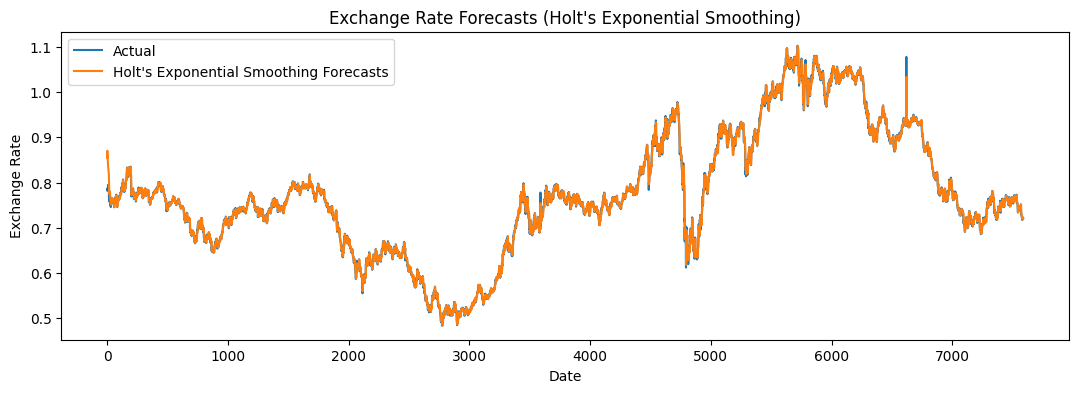

In [27]:
# Visualize the forecasts

plt.figure(figsize=(13, 4))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(predictions_holt, label='Holt\'s Exponential Smoothing Forecasts')
plt.title('Exchange Rate Forecasts (Holt\'s Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [28]:
final_df['Ex_rate'] = fitted_holt.fittedvalues

In [29]:
final_df

,date,Ex_rate,t,log_ex_rate,t_square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.782144,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.781474,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.778975,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.781950,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.782603,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,2010-06-10,0.718809,7584,-0.330598,57517056,Jun,2010,0,0,0,0,0,0,1,0,0,0,0,0
7584,2010-07-10,0.718497,7585,-0.325953,57532225,Jul,2010,0,0,0,0,0,1,0,0,0,0,0,0
7585,2010-08-10,0.720775,7586,-0.324074,57547396,Aug,2010,0,1,0,0,0,0,0,0,0,0,0,0
7586,2010-09-10,0.722430,7587,-0.327359,57562569,Sep,2010,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
mae_holt = mean_absolute_error(df['Ex_rate'], predictions_holt)
rmse_holt = mean_squared_error(df['Ex_rate'], predictions_holt, squared=False)
mape_holt = np.mean(np.abs((df['Ex_rate'] - predictions_holt) / df['Ex_rate'])) * 100

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
print('\nHolt\'s Exponential Smoothing:')
print('  MAE:', mae_holt)
print('  RMSE:', rmse_holt)
print('  MAPE:', mape_holt)


Holt's Exponential Smoothing:
  MAE: 0.003967482236734203
  RMSE: 0.006596592836387231
  MAPE: 0.5173798965179196


### ARIMA Model

### 3. Data Partition

In [30]:
Train = final_df[final_df['year'] <= '2009']
Test = final_df[final_df['year'] > '2009']

In [51]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(predictions_holt, order=(1,1,1))  # base model
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               30676.033
Date:                Mon, 05 Aug 2024   AIC                         -61346.067
Time:                        19:26:32   BIC                         -61325.264
Sample:                             0   HQIC                        -61338.928
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3490      0.030     11.601      0.000       0.290       0.408
ma.L1         -0.1770      0.030     -5.860      0.000      -0.236      -0.118
sigma2      1.798e-05   4.97e-08    361.631      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2849162.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model = ARIMA(predictions_holt, order=(2,1,2))  # base model
model_fit = model.fit()
model_fit.summary()

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               30677.635
Date:                Mon, 05 Aug 2024   AIC                         -61345.271
Time:                        19:26:45   BIC                         -61310.600
Sample:                             0   HQIC                        -61333.372
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.408     -0.113      0.910      -0.847       0.754
ar.L2          0.0397      0.156      0.254      0.799      -0.267       0.346
ma.L1          0.2177      0.408      0.533      0.594      -0.583       1.018
ma.L2          0.0351      0.092      0.382      0.702      -0.145       0.215
sigma2      1.797e-05   5.07e-08    354.726      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2841962.55
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Hyper parameter tuning

In [53]:
import itertools

p = [0, 1, 2, 4, 6]
d = range(0, 3)
q = range(0, 3)
optimal_params = None
min_aic = float('inf')

pdq = list(itertools.product(p, d, q))

for param in pdq:
    try:
        model = ARIMA(predictions_holt, order=param)
        results = model.fit()
        if results.aic < min_aic:
            optimal_params = param
        min_aic = min(min_aic, results.aic)
        
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

print(f'Best params: {optimal_params}, min_aic: {min_aic}')

ARIMA(0, 0, 0) - AIC:-8671.912790256569


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1) - AIC:-18894.039968570003


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 2) - AIC:-27735.587413539608


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) - AIC:-61099.808291557405
ARIMA(0, 1, 1) - AIC:-61316.379067064954
ARIMA(0, 1, 2) - AIC:-61349.27296450484
ARIMA(0, 2, 0) - AIC:-57319.53734870837
ARIMA(0, 2, 1) - AIC:-60122.10435389041


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2) - AIC:-60657.74434125039
ARIMA(1, 0, 0) - AIC:-61099.612679096856


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1) - AIC:-61316.83810585562
ARIMA(1, 0, 2) - AIC:-61349.998217822256
ARIMA(1, 1, 0) - AIC:-61340.13469304719
ARIMA(1, 1, 1) - AIC:-61346.06694700697
ARIMA(1, 1, 2) - AIC:-61347.205058194035
ARIMA(1, 2, 0) - AIC:-58881.58162961944
ARIMA(1, 2, 1) - AIC:-60361.37238697987
ARIMA(1, 2, 2) - AIC:-60551.78455994029
ARIMA(2, 0, 0) - AIC:-61340.774848096415
ARIMA(2, 0, 1) - AIC:-61346.60849663834
ARIMA(2, 0, 2) - AIC:-61347.96612268864


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0) - AIC:-61347.51199814447
ARIMA(2, 1, 1) - AIC:-61347.08927967303


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:-61345.27089099265


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0) - AIC:-59437.914746804745
ARIMA(2, 2, 1) - AIC:-60873.008099250445
ARIMA(2, 2, 2) - AIC:-60774.924084690276
ARIMA(4, 0, 0) - AIC:-61347.85067069555


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 1) - AIC:-61343.9673160154


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) - AIC:-61288.759434584055
ARIMA(4, 1, 0) - AIC:-61345.43148862396


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 1) - AIC:-61343.31396268789
ARIMA(4, 1, 2) - AIC:-61341.13576532525
ARIMA(4, 2, 0) - AIC:-60107.7090621791
ARIMA(4, 2, 1) - AIC:-60351.24612467678
ARIMA(4, 2, 2) - AIC:-60736.71164764338
ARIMA(6, 0, 0) - AIC:-61345.07930746243
ARIMA(6, 0, 1) - AIC:-61342.65554170592


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 2) - AIC:-61341.10005225649
ARIMA(6, 1, 0) - AIC:-61342.383666741036


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 1) - AIC:-61340.25273279124


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 2) - AIC:-61338.400599996305
ARIMA(6, 2, 0) - AIC:-60374.73931798634
ARIMA(6, 2, 1) - AIC:-60304.67097232257
ARIMA(6, 2, 2) - AIC:-60689.66672021571
Best params: (1, 0, 2), min_aic: -61349.998217822256


In [54]:
# Best model based on grid search

model = ARIMA(predictions_holt, order=optimal_params)
fitted_ARIMA = model.fit()  
fitted_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 0, 2)   Log Likelihood               30679.999
Date:                Mon, 05 Aug 2024   AIC                         -61349.998
Time:                        19:28:33   BIC                         -61315.327
Sample:                             0   HQIC                        -61338.099
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7771      0.081      9.617      0.000       0.619       0.935
ar.L1          0.9993      0.000   2260.633      0.000       0.998       1.000
ma.L1          0.1720      0.002     73.585      0.000       0.167       0.177
ma.L2          0.0675      0.006     11.338      0.000       0.056       0.079
sigma2      1.796e-05   5.12e-08    350.696      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2848657.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The above model has the lowest AIC score, and the P>|z| for all the weights are below 0.05, so it is reasonable to retain all of them in our model.

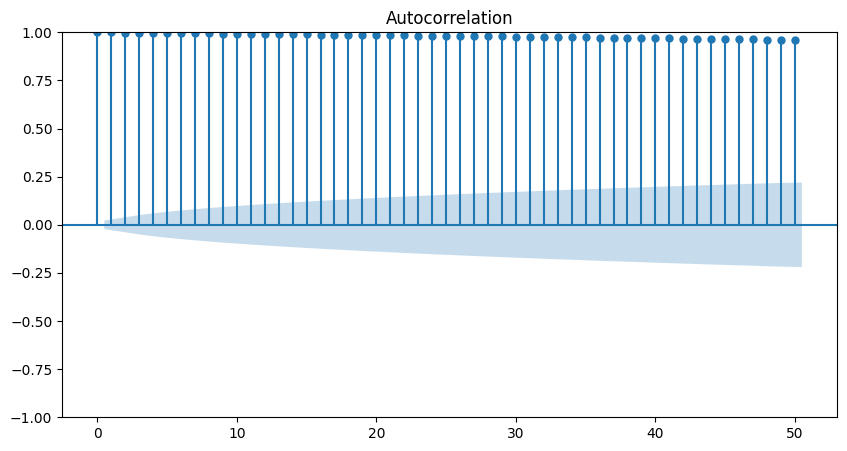

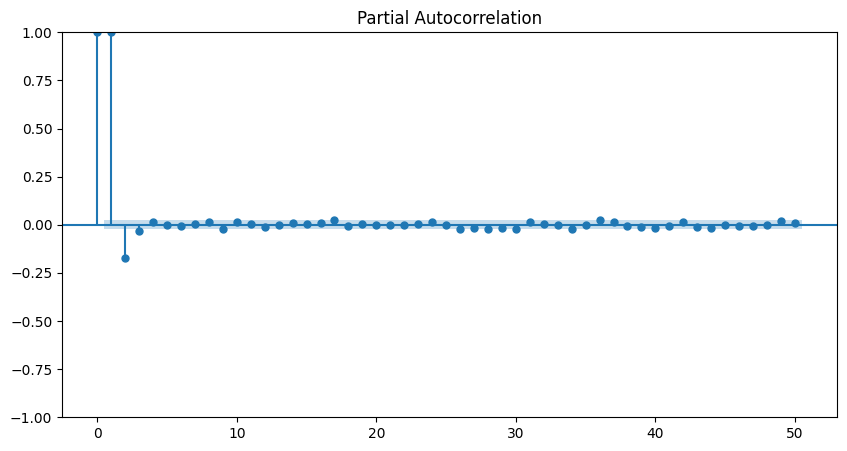

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(predictions_holt, lags=50)
plt.show()
plot_pacf(predictions_holt, lags=50)
plt.show()

In [56]:
forecast = fitted_ARIMA.predict(start=len(Train), end=len(final_df) - 1)

In [59]:
mae_arima = mean_absolute_error(Test['Ex_rate'], forecast)  # Use your ARIMA predictions from before
rmse_arima = mean_squared_error(Test['Ex_rate'], forecast, squared=False)
mape_arima = np.mean(np.abs((Test['Ex_rate'] - forecast) / Test['Ex_rate'])) * 100

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
print('ARIMA Model:')
print('  MAE:', mae_arima)
print('  RMSE:', rmse_arima)
print('  MAPE:', mape_arima)

ARIMA Model:
  MAE: 0.004375973322762413
  RMSE: 0.005844767982948082
  MAPE: 0.5830254355571421


Holt's Exponential Smoothing:
  1. MAE: 0.003967482236734203
  2. RMSE: 0.006596592836387231
  3. MAPE: 0.5173798965179196

ARIMA Model:
  1. MAE: 0.004375973322762413
  2. RMSE: 0.005844767982948082
  3. MAPE: 0.5830254355571421

Comparing the MAE, RMSE, and MAPE values of the ARIMA model and Holt's Smoothing model are very close to each other.

As the value of MAPE value 0.58% which is better model.

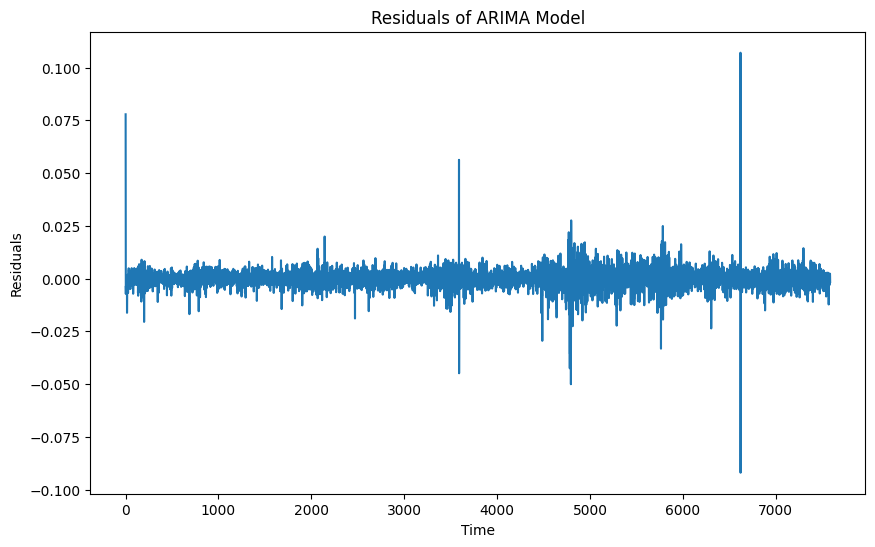

In [61]:
residuals = fitted_ARIMA.resid 
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

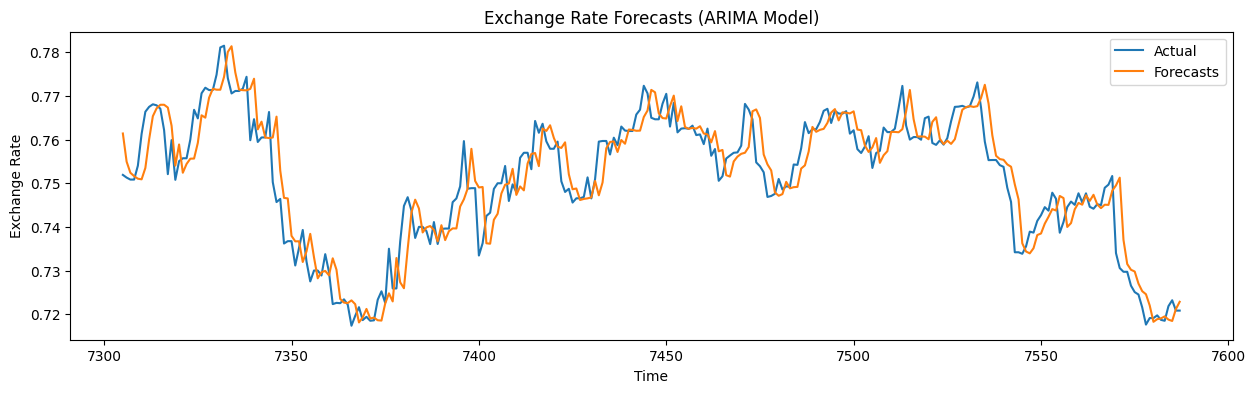

In [64]:
plt.figure(figsize=(15, 4))
plt.plot(Test.Ex_rate, label='Actual')
plt.plot(forecast, label='Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

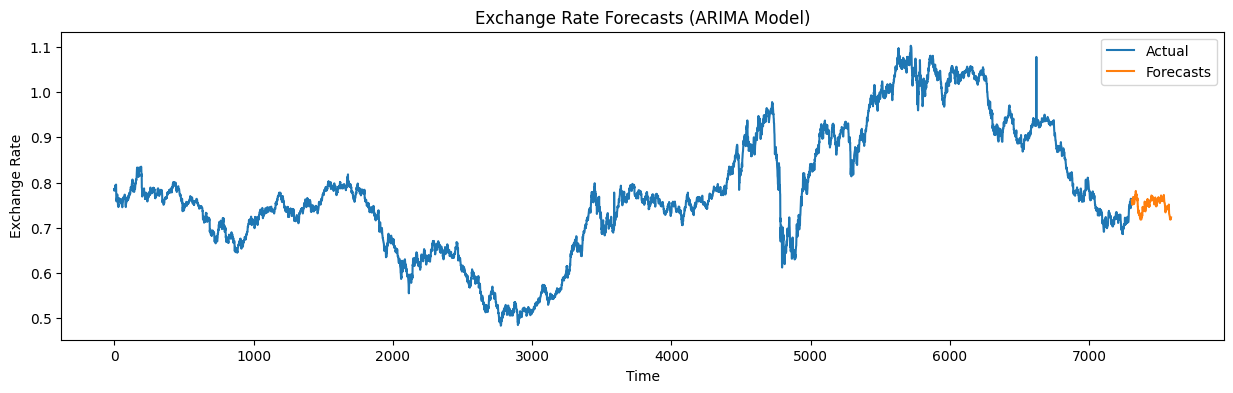

In [63]:
plt.figure(figsize=(15, 4))
plt.plot(Train.Ex_rate, label='Actual')
plt.plot(forecast, label='Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In the above graph, the orange line represents the predicted values of the ARIMA model which is continue of the Train data.